In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [134]:
df = pd.read_csv("Churn_Modelling.csv")

In [135]:
# Training dataset
print("Shape of the dataframe : ")
print(df.shape)
print() 

print("Data types of each column in the dataframe: ")
print(df.dtypes)
print()

Shape of the dataframe : 
(10000, 14)

Data types of each column in the dataframe: 
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object



In [136]:
print("Invoking the info() method on the dataframe:")
print(df.info())
print()

print("Invoking the describe() method on the dataframe:")
print(df.describe())
print()

Invoking the info() method on the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Invoking the describe() method on the dataf

Making a copy of the dataframe

In [137]:
data  = df.copy()

In [138]:
data.drop("CustomerId",axis="columns",inplace=True)

In [139]:
data.drop("Surname",axis="columns",inplace=True)
data.drop("RowNumber",axis="columns",inplace=True)

In [140]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [141]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [142]:
data['Balance'] = data['Balance'].astype(int)
data['EstimatedSalary'] = data['EstimatedSalary'].astype(int)

Visualization

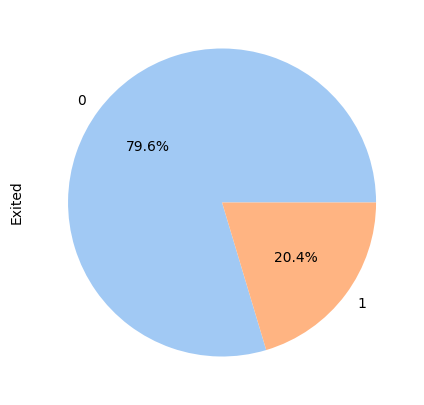

In [143]:
plt.figure(figsize=(5,5))
palette = sns.color_palette('pastel')
data.groupby('Exited')['Exited'].count().plot.pie(colors=palette, autopct="%1.1f%%");

This shows that 20.4% have exited from the company


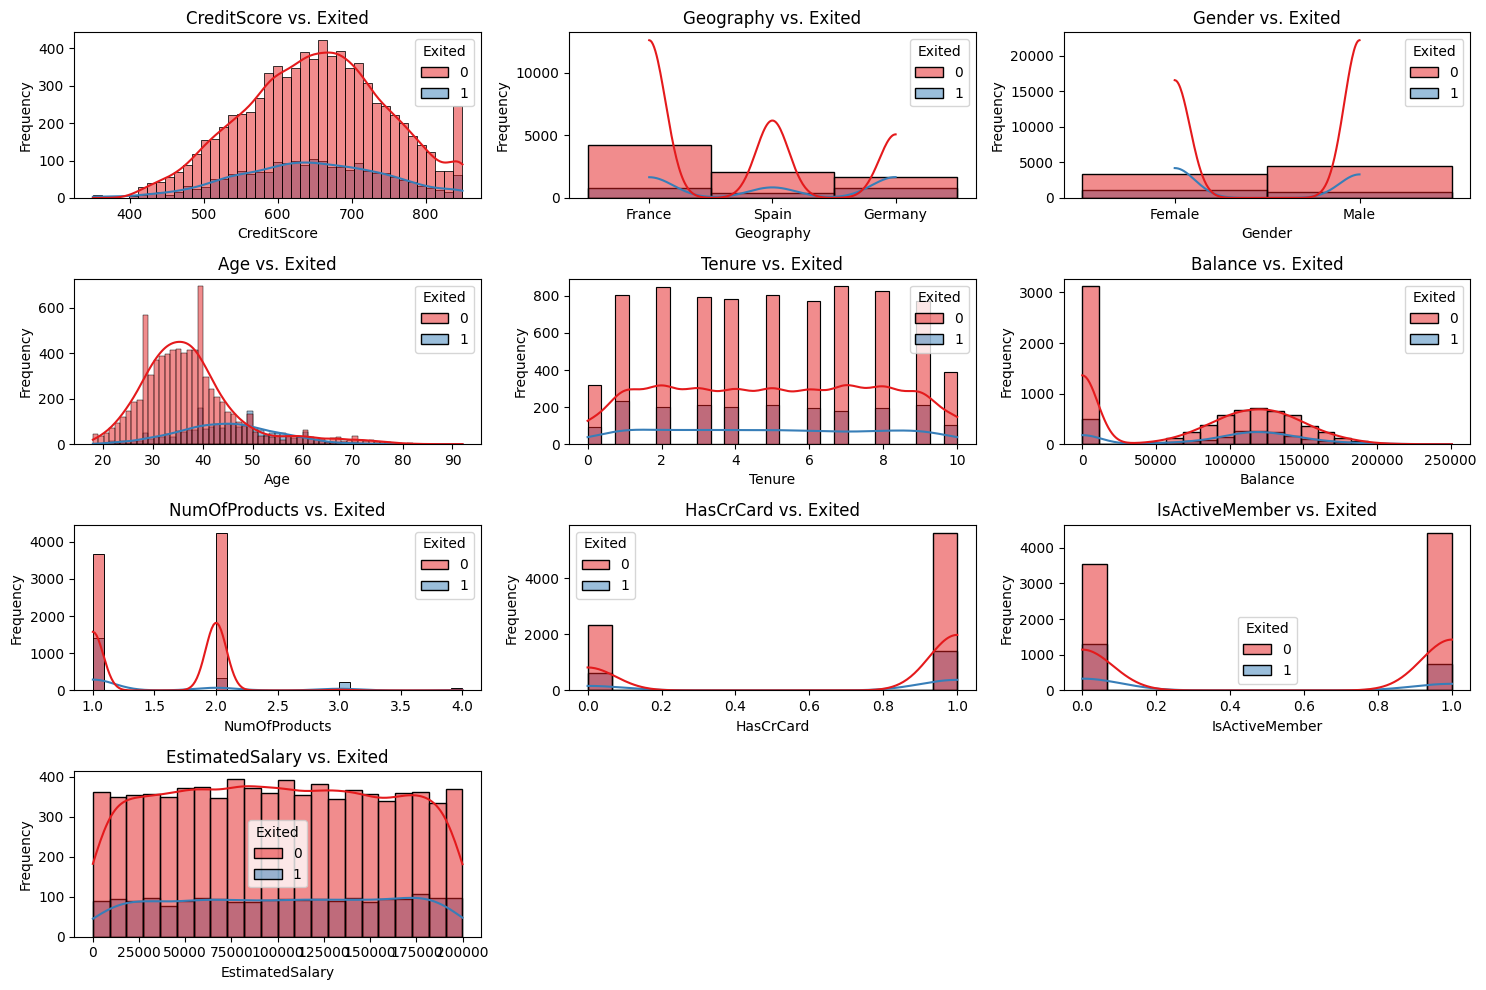

In [144]:
features = data.columns[:-1]

fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()
for feature, ax in zip(features, axes):
    sns.histplot(x=feature, hue='Exited', data=data, kde=True, ax=ax, palette='Set1')
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

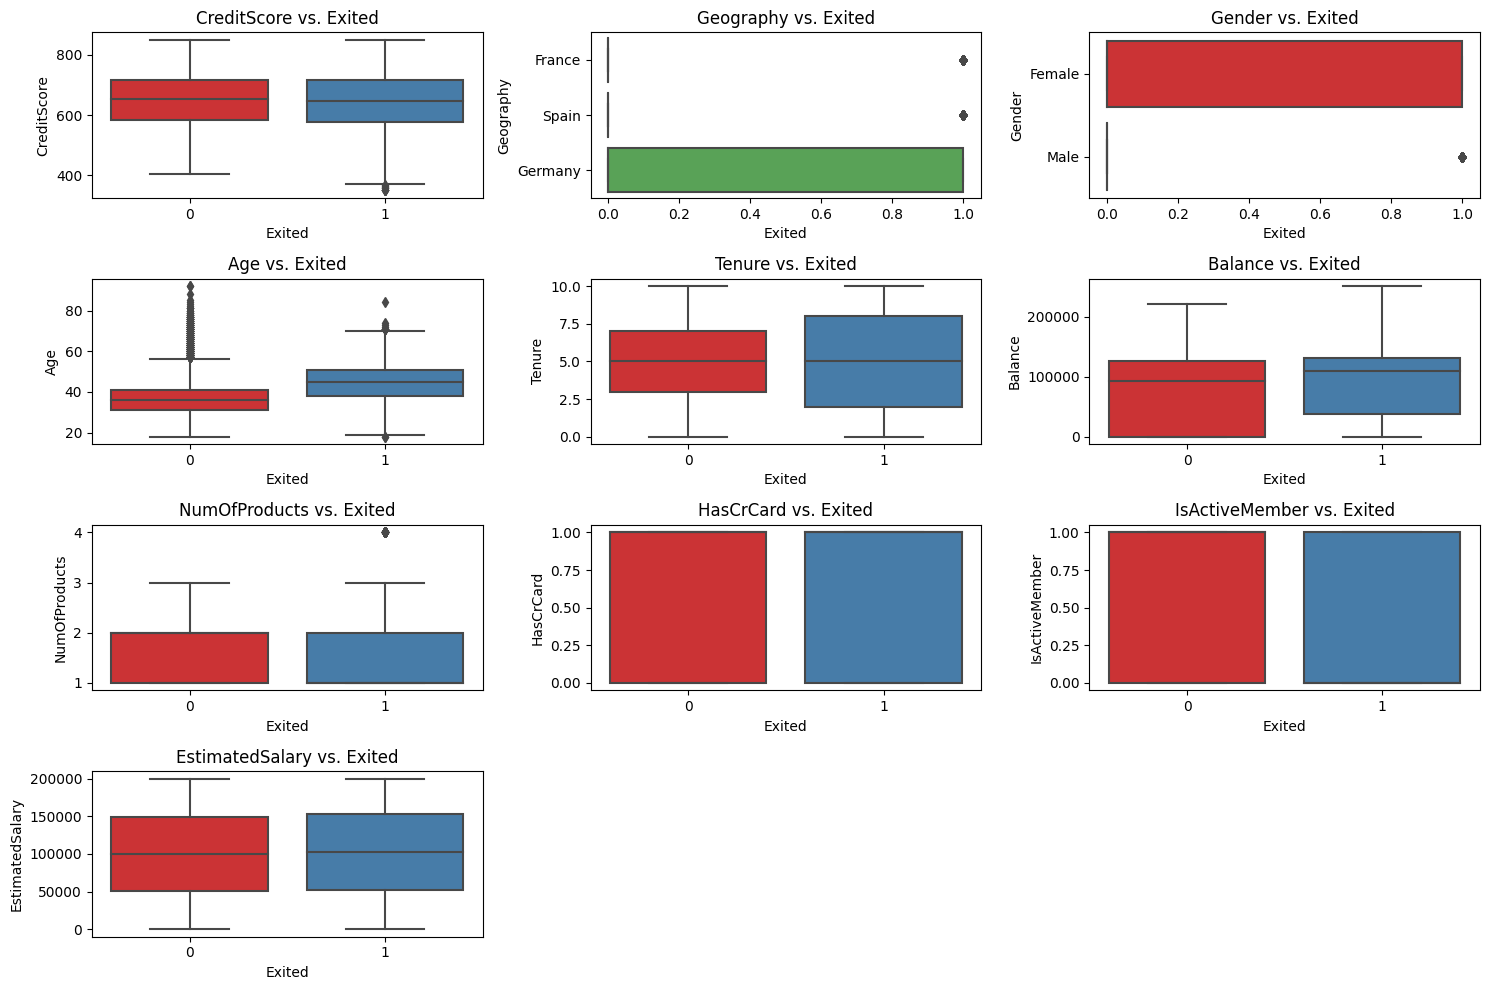

In [145]:
fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()
for feature, ax in zip(features, axes):
    sns.boxplot(x='Exited', y=feature, data=data, ax=ax, palette='Set1')
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel('Exited')
    ax.set_ylabel(feature)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])    
plt.tight_layout()
plt.show()

From the above graphs, it is clear that:
* Females are tend to churn more.
* Those of age 40-50 are tend to churn more.
* Those living in Germany are tend to churn more.

Hence, the churning rate is dependent on gender, age, country.

Label Encoding

In [146]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [147]:
# One-hot encode categorical variables
df = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [148]:
data.sample(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7565,708,France,1,52,10,105355,1,1,0,123,1
8124,791,Germany,0,33,10,130229,2,0,0,54019,1
7302,491,France,0,72,6,91285,1,1,1,7032,0
1272,585,Germany,0,39,7,165610,2,0,0,131852,0
2942,850,France,0,42,9,113311,1,1,1,198193,0
5126,654,Spain,0,54,5,0,2,0,1,47139,0
8237,649,France,1,39,3,113096,1,1,1,60335,0
474,571,France,0,33,1,0,2,1,0,102750,0


Train test split

In [149]:
x = df.drop('Exited',axis='columns')
y = df['Exited']

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [152]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight = 'balanced',random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [153]:
y_pred = rf_model.predict(x_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cls_rpt = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", cls_rpt)

Accuracy: 0.87
Confusion Matrix:
 [[1555   52]
 [ 212  181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [155]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC Score: {auc_roc:.4f}')

AUC-ROC Score: 0.8569


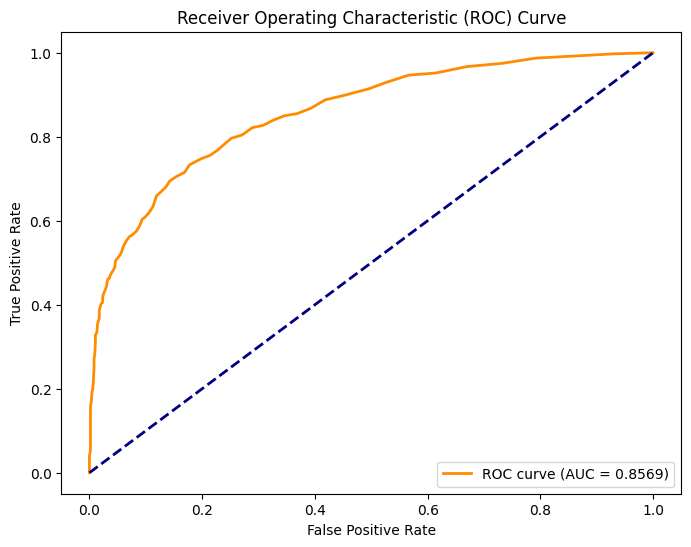

In [156]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The overall accuracy of the model is 86%.


XG boost

In [157]:
# Example for XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [158]:
y_pred_xgb = xgb_model.predict(x_test)

In [159]:
acc = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
cls_rpt = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", cls_rpt)

Accuracy: 0.82
Confusion Matrix:
 [[1393  214]
 [ 139  254]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.54      0.65      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



Ensemble method

In [160]:
from imblearn.ensemble import EasyEnsembleClassifier

eem = EasyEnsembleClassifier(n_estimators=10, random_state=42)
eem.fit(x_train,y_train)

EasyEnsembleClassifier(random_state=42)

In [161]:
y_pred_ensemble = eem.predict(x_test)

In [162]:
acc = accuracy_score(y_test, y_pred_ensemble)
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
cls_rpt = classification_report(y_test, y_pred_ensemble)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", cls_rpt)

Accuracy: 0.79
Confusion Matrix:
 [[1274  333]
 [  87  306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1607
           1       0.48      0.78      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000



The random forest classifier is shown to perform better compared to other models.